In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pdb
plt.style.use('ggplot')


## Cenetered Difference Method for 1st Derivatives

$$ h^{-1}\begin{bmatrix} -\frac{1}{2} \quad 0 \quad \frac{1}{2} \end{bmatrix}  $$ Although, this won't help with the boundaries. So let's naively take one-sided differences at each boundary. 

We'll use the function $f(x) = sin(x)$ and its derivative $\frac{df}{dx} = cos(x)$ as the test functions for now.

In [2]:
def diffmat(n):
    x = np.linspace(-1,1,n)
    h = 2 / n
    e = np.ones(n)
    L = (0 * np.eye(n+1) + .5*np.diag(e, 1) -.5* np.diag(e, -1)) / (h)
    L[0,:] = (-np.eye(n+1)[0,:] +np.diag(e,1)[0,:])/ (h)
    L[-1,:] = (np.eye(n+1)[-1,:] - np.diag(e,-1)[-1,:])/(h)
    return L
    
def grid_error(diff, f, fp):
    ns = 2**np.arange(3,8)
    error = []
    for n in ns:
        x = np.linspace(-1,1,n+1)
        du = fp(x)
        Du = np.matmul(diff(n), f(x))
        error.append(np.linalg.norm(Du - du,np.inf))
    plt.loglog(ns, error, 'o', label='diff')
    plt.loglog(ns, (ns-1)**(-1.), label='$h$')
    plt.loglog(ns, (ns-1)**(-2.), label='$h^2$')
    plt.legend(loc='upper right')
    plt.xlabel('Resolution $n$')
    plt.ylabel('Error')
    plt.show()

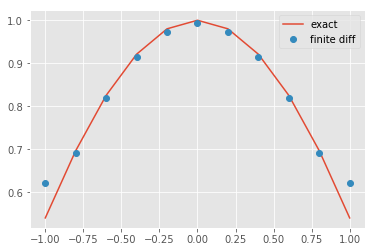

In [3]:
n = 10
x = np.linspace(-1,1,n+1)
du = np.cos(x)
op = diffmat(n)
Du = np.dot(op, np.sin(x))
plt.plot(x, du, label='exact')
plt.plot(x, Du,'o', label='finite diff')
plt.legend(loc='upper right')
plt.show()

Now we'll compute the error based on the grid size.

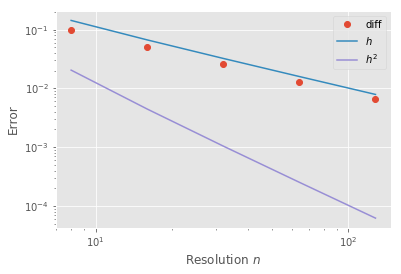

In [4]:
grid_error(diffmat, np.sin, np.cos)

For finding the error for each grid size, I'm using the $L_{\inf}$ norm. If for some points, the approximation does not show first order accuracy, or is not accurate at all, then that value won't get averaged out when using large grid sizes. 

Let's compare this plot with a plot not including the boundaries

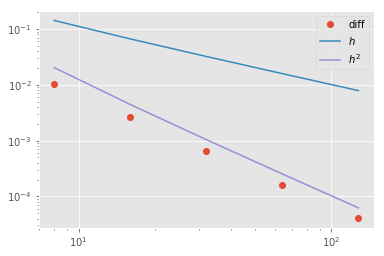

In [5]:
ns = 2**np.arange(3,8)
error = []
for n in ns:
    x = np.linspace(-1,1,n+1)
    du = np.cos(x)[1:-1]
    Du = np.dot(diffmat(n), np.sin(x))[1:-1]
    error.append(np.linalg.norm(Du - du,np.inf))
plt.loglog(ns, error, 'o', label='diff')
plt.loglog(ns, (ns-1)**(-1.), label='$h$')
plt.loglog(ns, (ns-1)**(-2.), label='$h^2$')
plt.legend(loc='upper right')
plt.show()

We can clearly see that the boundaries make the estimation 1st order accurate. 

## Finite Difference at the Boundaries
To better estimate the right boundary condition, use taylor expansions of $u(x)$, $u(x-h)$, and $u(x-2h)$ and the method of undetermined coefficients.

$$ D_2u(x) = au(x) + bu(x-h) + cu(x-2h) $$

Where, $$ u(x-h) = u(x) -hu'(x) + \frac{1}{2}h^2u''(x) + - \frac{1}{6}h^3u'''(x) + O(h^4)$$ and $$ u(x-2h) = u(x) -2hu'(x) + 2h^2u''(x) - \frac{8}{6}h^3u'''(x) + O(h^4) $$

Solving for a, b, and c give $$ a = \frac{3}{2h}, b = \frac{-2}{h}, \text{ and}, c = \frac{1}{2h} $$

Therefore giving a stencil of $$ h^{-1}\begin{bmatrix} .5 & -2 & 1.5 \end{bmatrix} $$

Following a similar argument for the left boundary, the stencil is $$ h^{-1}\begin{bmatrix} -.5 & 2 & -1.5 \end{bmatrix} $$

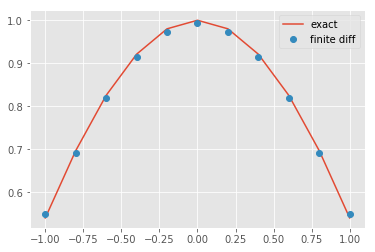

In [6]:
def diffmat2(n):
    x = np.linspace(-1,1,n)
    h = 2 / n
    e = np.ones(n)
    L = (0 * np.eye(n+1) + .5*np.diag(e, 1) -.5* np.diag(e, -1)) / (h)
    L[0,:] = (-3*np.eye(n+1)[0,:] + 4*np.diag(e,1)[0,:] - np.diag(np.ones(n-1),2)[0,:])/ (2*h)
    L[-1,:] = (3*np.eye(n+1)[-1,:] -4*np.diag(e, -1)[-1,:] + np.diag(np.ones(n-1), -2)[-1,:])/(2*h)
    return L
n = 10
x = np.linspace(-1,1,n+1)
du = np.cos(x)
op = diffmat2(n)
Du = np.matmul(op, np.sin(x))
plt.plot(x, du, label='exact')
plt.plot(x, Du,'o', label='finite diff')
plt.legend(loc='upper right')
plt.show()

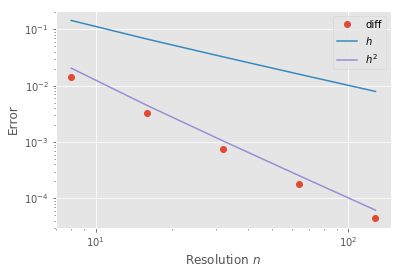

In [7]:
grid_error(diffmat2, np.sin, np.cos)

Now the error is 2nd order accurate for all points on the grid!

## Finite Difference for 2nd Derivative

To solve for the 2nd derivative, we'll use a combination of the left and right difference methods for first derivatives. 

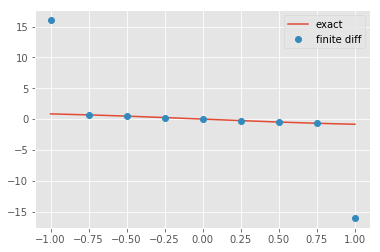

In [8]:
def diff2mat(n):
    x = np.linspace(-1,1,n+1)
    h = 2/n
    e = np.ones(n)
    L = (np.diag(e, -1) - 2*np.eye(n+1) + np.diag(e,1)) / (h**2)
    return L
n = 8
x = np.linspace(-1,1,n+1)
d2u = -np.sin(x)
op = diff2mat(n)
D2u = np.matmul(op, np.sin(x))
plt.plot(x, d2u, label='exact')
plt.plot(x, D2u,'o', label='finite diff')
plt.legend(loc='upper right')
plt.show()

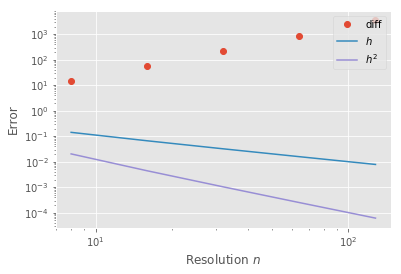

In [9]:
grid_error(diff2mat, np.sin, lambda l: -np.sin(l))

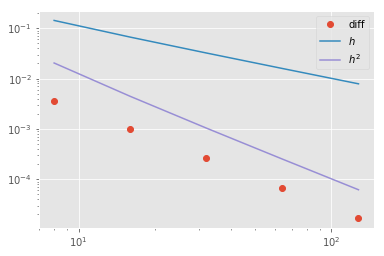

In [10]:
ns = 2**np.arange(3,8)
error = []
for n in ns:
    x = np.linspace(-1,1,n+1)
    d2u = -np.sin(x)[1:-1]
    D2u = np.dot(diff2mat(n), np.sin(x))[1:-1]
    error.append(np.linalg.norm(D2u - d2u,np.inf))
plt.loglog(ns, error, 'o', label='diff')
plt.loglog(ns, (ns-1)**(-1.), label='$h$')
plt.loglog(ns, (ns-1)**(-2.), label='$h^2$')
plt.legend(loc='upper right')
plt.show()

## 2nd Derivative Finite Difference at the Boundaries
Again, we are presented with the same issue. So follow the same approach from the 1st derivative, but this time use $u(x), u(x\pm h), u(x \pm 2h)$ and $u(x \pm 3h)$ to expand and solve for the coefficients. Expanding, and setting up the system of equations gives the matrix 

$$ \begin{bmatrix} 1 & 1 & 1 & 1 \\ 0 & -1 & -2 & -3 \\ 0 & \frac{1}{2} & 2 & \frac{9}{2} \\ 0 & \frac{-1}{6} & \frac{-8}{6} & \frac{-27}{6} \end{bmatrix} \begin{bmatrix} a \\ b \\ c \\ d \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ \frac{1}{h^2} \\ 0 \end{bmatrix} $$

Solving for $a,b,c$ and $d$ gives: 

$$ a = \frac{2}{h^2}, b=\frac{-5}{h^2}, c=\frac{4}{h^2}, d=\frac{-1}{h^2} $$

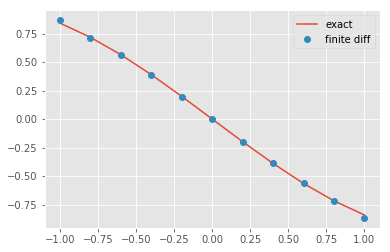

In [35]:
def diff2mat2(n):
    h = 2/n
    e = np.ones(n)
    L = (np.diag(e, -1) - 2*np.eye(n+1) + np.diag(e,1)) / (h**2)
    L[0,:] = (2*np.eye(n+1)[0,:] -5*np.diag(e,1)[0,:] + 4*np.diag(np.ones(n-1),2)[0,:] - np.diag(np.ones(n-2),3)[0,:]) /(h**2)
    L[-1,:] = (2*np.eye(n+1)[-1,:] -5*np.diag(e,-1)[-1,:] +4* np.diag(np.ones(n-1),-2)[-1,:] - np.diag(np.ones(n-2),-3)[-1,:])/(h**2)
    return L
n = 10
x = np.linspace(-1,1,n+1)
d2u = -np.sin(x)
op = diff2mat2(n)
D2u = np.matmul(op, np.sin(x))
plt.plot(x, d2u, label='exact')
plt.plot(x, D2u,'o', label='finite diff')
plt.legend(loc='upper right')
plt.show()

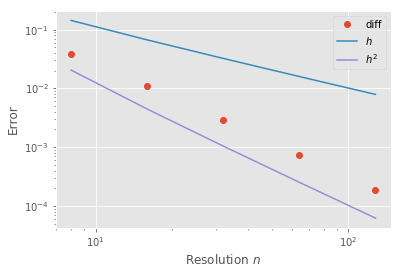

In [36]:
grid_error(diff2mat2, np.sin, lambda l: -np.sin(l))

We see that considering more terms on either boundary gives a higher order accuracy. 

Let's compare these solutions for multiple different functions and their derivatives

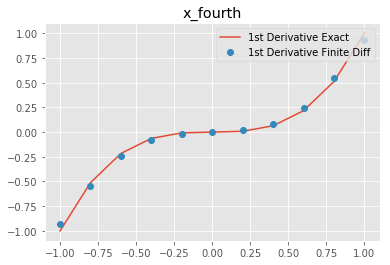

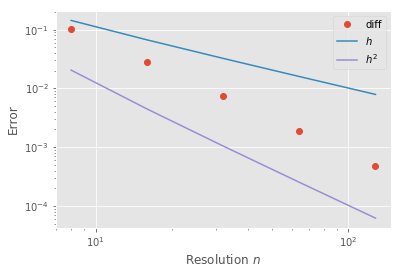

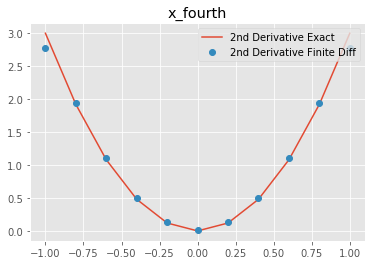

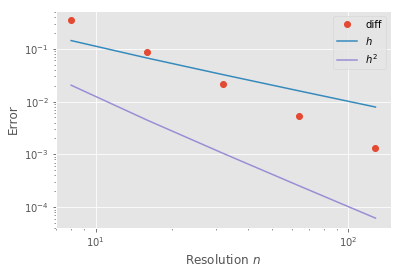

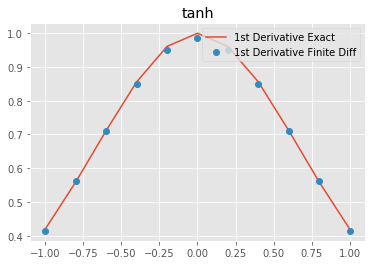

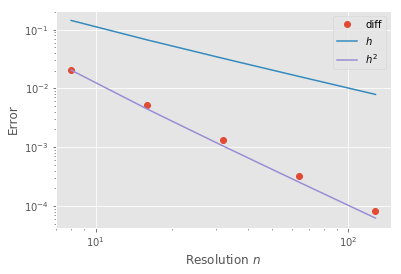

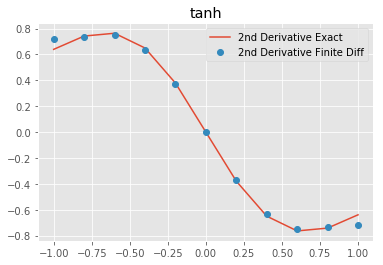

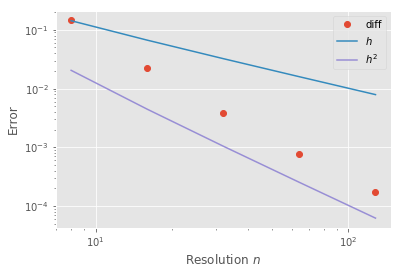

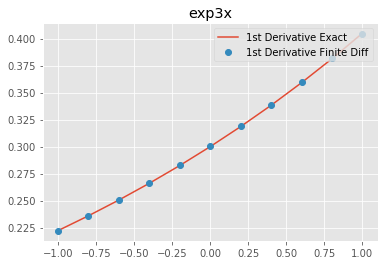

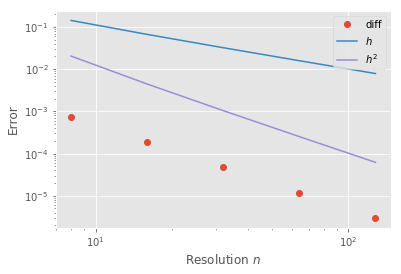

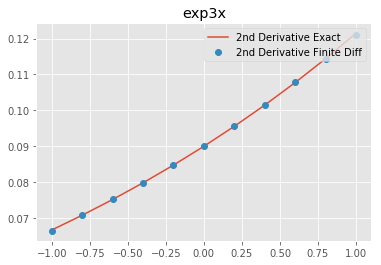

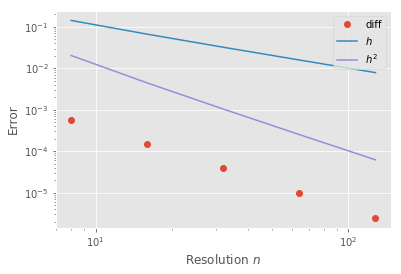

In [27]:
def x_fourth():
    return lambda x: .25*x**4, lambda x: (x**3), lambda x: 3*(x**2)
def tanh():
    return np.tanh, lambda x: 1 - np.tanh(x)**2, lambda x: -2*np.tanh(x)*(1 - np.tanh(x)**2)
def exp3x():
    return lambda x: np.exp(.3*x), lambda x: .3*np.exp(.3*x), lambda x: (.3**2)*np.exp(.3*x)


for funcs in (x_fourth, tanh, exp3x):
    f = funcs()
    n = 10
    x = np.linspace(-1,1,n+1)
    du = f[1]
    d2u = f[2]
    Du = np.matmul(diffmat2(n),f[0](x)) 
    D2u = np.matmul(diff2mat2(n), f[0](x))
    for d in ((du,Du, '1st Derivative', diffmat2), (d2u, D2u, '2nd Derivative',diff2mat2)):
        plt.title(funcs.__name__)
        plt.plot(x, d[0](x), label='{} Exact'.format(d[2]))
        plt.plot(x, d[1], 'o', label='{} Finite Diff'.format(d[2]))
        plt.legend(loc='upper right')
        plt.show()
        grid_error(d[3], f[0], d[0])

## Non-Uniform Grid

These previous models were all tested with equally spaced values in x. If this condition is not preserved, the accuracy of the matrix operator is lost

In [65]:
#perturb each point by (-1/4)*h < a < (1/4)*h
def perturb(x):
    n = len(x)
    p = np.linspace(-1/(2*n),1/(2*n))
    x[0] = x[0] + np.random.choice(p[len(p)//2:])
    x[1:-1] = x[1:-1] + np.random.choice(p)
    x[-1] = x[-1] + np.random.choice(p[:len(p)//2])
    return x

[-0.98051948 -0.80649351 -0.60649351 -0.40649351 -0.20649351 -0.00649351
  0.19350649  0.39350649  0.59350649  0.79350649  0.99907236]


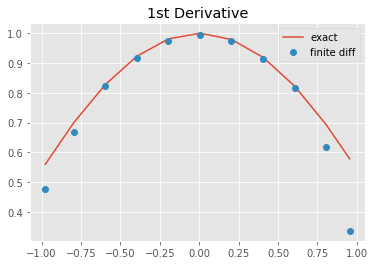

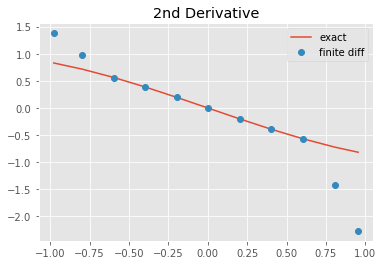

In [89]:
n = 10
x = perturb(np.linspace(-1,1,n+1))
L = diffmat2(n)
L2 = diff2mat2(n)
du = np.cos(x)
d2u = -np.sin(x)
Du = np.matmul(L, np.sin(x))
D2u = L2 @ np.sin(x)
plt.plot(x, du, label='exact')
plt.plot(x, Du,'o', label='finite diff')
plt.legend(loc='upper right')
plt.title('1st Derivative')
plt.show()
plt.plot(x, d2u, label='exact')
plt.plot(x, D2u, 'o', label='finite diff')
plt.legend(loc='upper right')
plt.title('2nd Derivative')
plt.show()

In [94]:
def non_even_grid_error(diff, f, fp):
    ns = 2**np.arange(3,10)
    error = []
    for n in ns:
        x = np.linspace(-1,1,n+1)
        x = perturb(x)
        du = fp(x)
        Du = np.matmul(diff(n), f(x))
        error.append(np.linalg.norm(Du - du,np.inf))
    plt.loglog(ns, error, 'o', label='diff')
    plt.loglog(ns, np.ones(len(ns)), label='constant')
    plt.loglog(ns, (ns-1)**(-1.), label='$\\frac{1}{h}$')
    plt.loglog(ns, (ns-1)**(-2.), label='$\\frac{1}{h^2}$')
    plt.legend(loc='lower left')
    plt.xlabel('Resolution $n$')
    plt.ylabel('Error')
    plt.show()

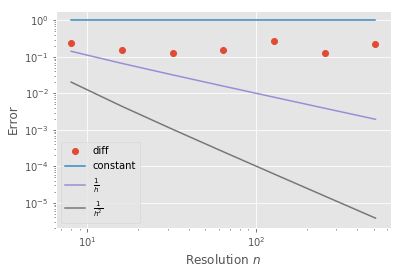

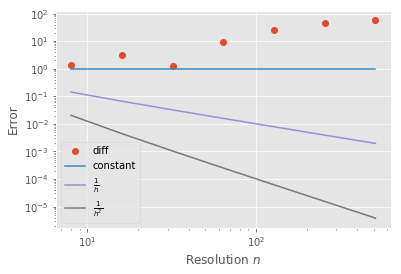

In [97]:
non_even_grid_error(diffmat2, np.tanh, lambda x: 1-np.tanh(x)**2)
non_even_grid_error(diff2mat2, np.sin, lambda x: -2*np.tanh(x)*(1 - np.tanh(x)**2))

Using a non-uniform grid results in loss of accuracy from 2nd order to constant. 